In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


**dataset is taken from https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Describing the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Attribute Information**

1. **ID number**
2. **Diagnosis (M = malignant, B = benign)**
3-12. Ten real-valued features are computed for each cell nucleus:
    - a. Radius (mean of distances from center to points on the perimeter)
    - b. Texture (standard deviation of gray-scale values)
    - c. Perimeter
    - d. Area
    - e. Smoothness (local variation in radius lengths)
    - f. Compactness (perimeter^2 / area - 1.0)
    - g. Concavity (severity of concave portions of the contour)
    - h. Concave points (number of concave portions of the contour)
    - i. Symmetry
    - j. Fractal dimension ("coastline approximation" - 1)
13-32. The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

**Missing attribute values:** none

**Class distribution:** 357 benign, 212 malignant


In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

<Axes: xlabel='diagnosis'>

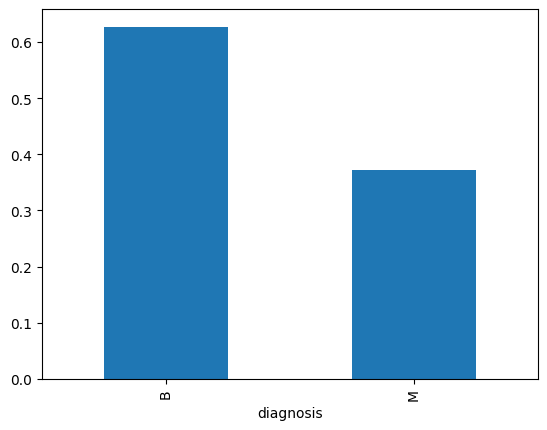

In [10]:
data.diagnosis.value_counts(normalize=True).plot(kind='bar')

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

# Fit and transform the 'diagnosis' column
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [13]:
data['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [14]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
corr_values = data.corr()

tril_index = np.tril_indices_from(corr_values)

for coord in zip(*tril_index):
    corr_values.iloc[coord[1],coord[0]] = np.NaN

In [16]:
corr_values

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,0.730029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,0.415185,0.323782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.742636,0.997855,0.329533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,0.708984,0.987357,0.321086,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


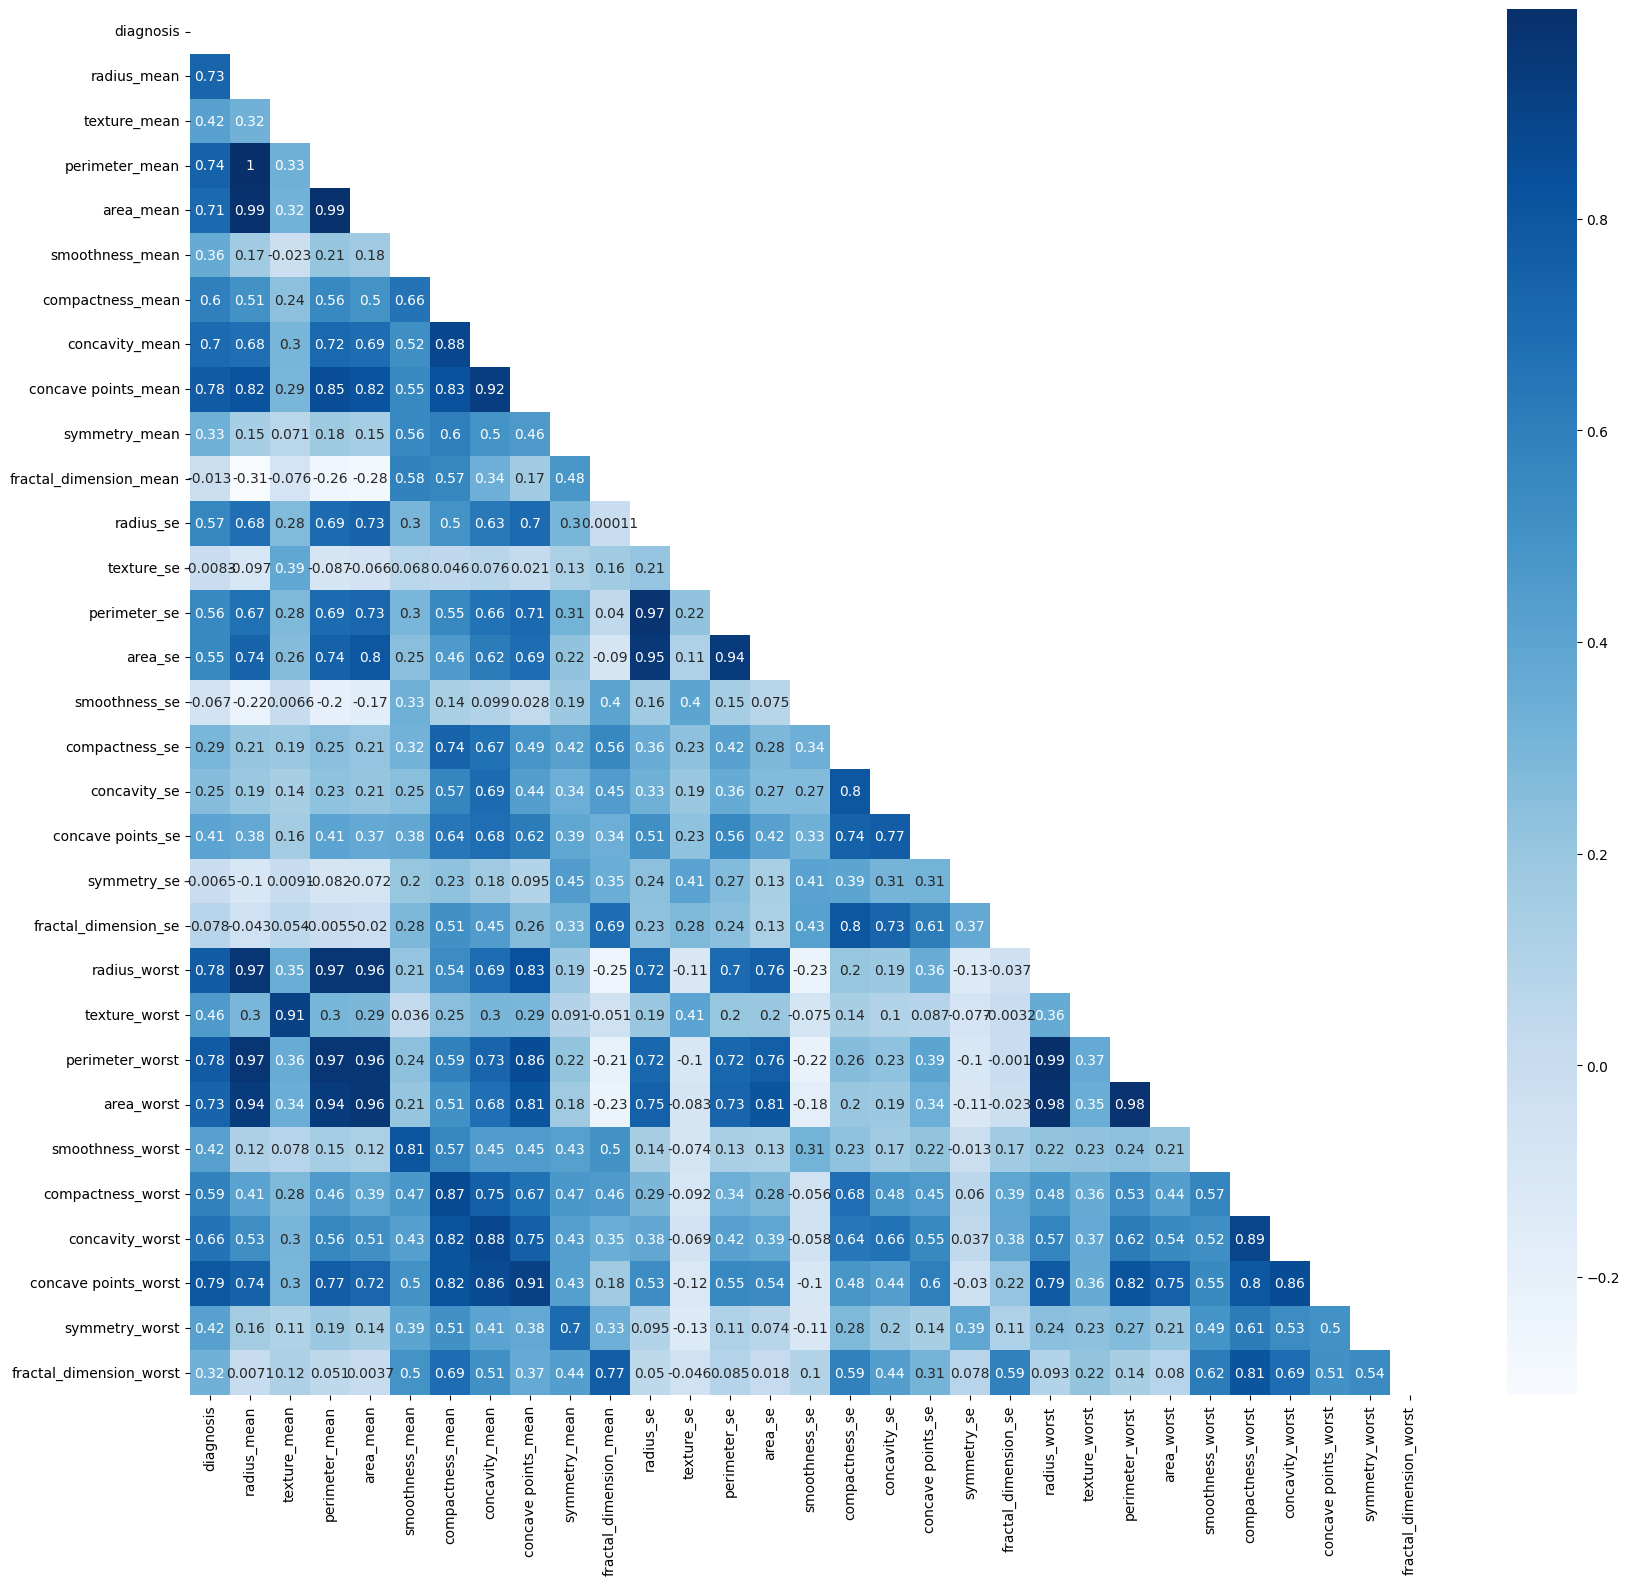

In [17]:
plt.figure(figsize=(20,18))
sns.heatmap(corr_values,cmap='Blues',annot=True)
plt.show()

In [18]:
sorted_corr_values = corr_values['diagnosis'].abs().sort_values(ascending=False)

In [62]:
selected_indices = sorted_corr_values[sorted_corr_values>0.45].index
pd.DataFrame(selected_indices)

,0
0,concave points_worst
1,perimeter_worst
2,concave points_mean
3,radius_worst
4,perimeter_mean
5,area_worst
6,radius_mean
7,area_mean
8,concavity_mean
9,concavity_worst


In [20]:
diagnosis = data['diagnosis']

In [21]:
new_data = data[selected_indices]
new_data = pd.concat([new_data,diagnosis],axis=1)
new_data.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,diagnosis
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40,17.33,1
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08,23.41,1
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03,25.53,1
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23,26.50,1
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44,16.67,1


In [22]:
nn = new_data.loc[new_data.diagnosis==0]

In [23]:
nn.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,diagnosis
19,0.12880,99.70,0.047810,15.110,87.46,711.2,13.540,566.3,0.06664,0.23900,0.08129,0.17730,0.2699,2.058,23.560,19.26,0
20,0.07283,96.09,0.031100,14.500,85.63,630.5,13.080,520.0,0.04568,0.18900,0.12700,0.27760,0.1852,1.383,14.670,20.49,0
21,0.06227,65.13,0.020760,10.230,60.34,314.9,9.504,273.9,0.02956,0.08867,0.06492,0.11480,0.2773,1.909,15.700,15.66,0
37,0.05013,84.46,0.029230,13.300,82.61,545.9,13.030,523.8,0.02562,0.04833,0.03766,0.04619,0.1839,1.170,14.160,22.81,0
46,0.02564,57.26,0.005917,8.964,51.71,242.2,8.196,201.9,0.01588,0.06880,0.05943,0.13570,0.1563,1.094,8.205,21.96,0


In [24]:
X = new_data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=2)

In [27]:
y_train.value_counts(normalize=True)

diagnosis
0    0.626761
1    0.373239
Name: proportion, dtype: float64

In [28]:
X_train.shape

(426, 16)

# Creating model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
model_2 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

**With regularization**

In [32]:
from sklearn.linear_model import LogisticRegressionCV
model_l1 = LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear').fit(X_train,y_train)

In [33]:
model_l2_lbfgs = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train,y_train)

In [34]:
model_l2 = LogisticRegressionCV(Cs=10,cv=4,penalty='l2',solver='liblinear').fit(X_train,y_train)

**With scalling**

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [36]:
model_l2_lbfgs_std = LogisticRegressionCV(Cs=10,cv=4,penalty='l2').fit(X_train_std,y_train)

**showing result**

In [37]:
y_pred = list()
y_prob = list()

coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs']
coeff_models = [model, model_2, model_l1,model_l2,model_l2_lbfgs]

for lab,mod in zip(coeff_labels,coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test),name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1),name=lab))
    
y_pred.append(pd.Series(model_l2_lbfgs_std.predict(X_test_std),name='model_l2_lbfgs_std'))
y_prob.append(pd.Series(mod.predict_proba(X_test_std).max(axis=1),name='model_l2_lbfgs_std'))

In [38]:
y_pred=pd.concat(y_pred,axis=1)
y_prob=pd.concat(y_prob,axis=1)

In [39]:
y_pred.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1


In [40]:
y_prob.head()

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
0,0.659819,0.642619,0.925473,0.656049,0.734529,1.000000
1,0.985849,0.986409,0.999999,0.999568,0.999884,1.000000
2,0.999262,0.999232,1.000000,0.999989,0.999999,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.999999,0.999998,1.000000,1.000000,1.000000,0.935077


In [41]:
coeff_labels = ['model', 'model_2', 'model_l1','model_l2','model_l2_lbfgs','model_l2_lbfgs_std']

In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

metrics = list()
cf_mat = dict()

for lab in coeff_labels:
    precision,recall,fscore,_ = score(y_test,y_pred[lab],average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    cf_mat[lab] = confusion_matrix(y_test,y_pred[lab])
    
    metrics.append(pd.Series({'precision': precision,
                             'recall': recall,'fscore': fscore,'accuracy': accuracy},name=lab))
    
metrics= pd.concat(metrics,axis=1)

In [43]:
metrics

,model,model_2,model_l1,model_l2,model_l2_lbfgs,model_l2_lbfgs_std
precision,0.930960,0.930960,0.937396,0.937396,0.937396,0.93007
recall,0.930070,0.930070,0.937063,0.937063,0.937063,0.93007
fscore,0.930325,0.930325,0.937181,0.937181,0.937181,0.93007
accuracy,0.930070,0.930070,0.937063,0.937063,0.937063,0.93007


<Axes: >

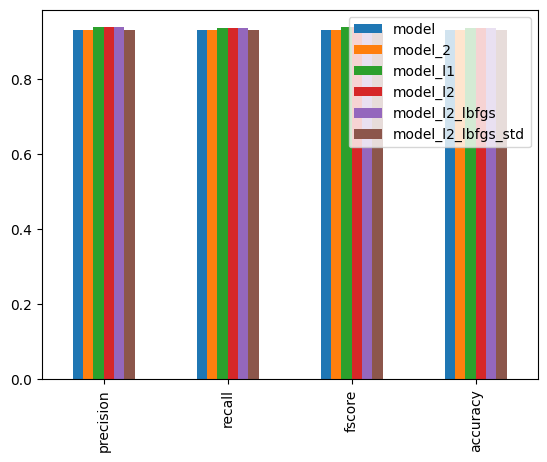

In [63]:
metrics.plot(kind='bar')

**model with L2 regularization is performing best**

In [44]:
#input_data = (0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24)
#changing the data to numpy array
input_data_numpy = np.asarray(X_test.iloc[1])
input_data = input_data_numpy.reshape(1,-1)

prediction = model_l2.predict(input_data)

if(prediction==0):
    print('The patient has no diabetes.')
else:
    print('The patient has diabetes.')


The patient has no diabetes.


# Creating Premium version

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
#the parameters to be fit
param_grid = {
    'n_estimators': [15, 25, 50, 100, 200, 400],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'subsample': [1.0, 0.5]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42),
                          param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [15, 25, 50, 100, 200, 400],
                         'subsample': [1.0, 0.5]},
             scoring='accuracy')

In [46]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 400, 'subsample': 0.5}

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = grid_search.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        93
           1       0.87      0.92      0.89        50

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



In [48]:
accuracy_score(y_pred,y_test)

0.9230769230769231

In [49]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k_param = {
    'n_neighbors': [3,5,7,9,11]
}
k_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=k_param, scoring='accuracy',
                       n_jobs=-1)
k_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='accuracy')

In [51]:
k_search.best_params_

{'n_neighbors': 3}

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt_param = {
    'max_depth': [1,2,3,4,5,6,7],
    'criterion' : ["gini", "entropy", "log_loss"],
    
}
dt_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_param, scoring='accuracy',
                       n_jobs=-1)
dt_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [54]:
dt_search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [55]:
estimators = [('LR',LogisticRegressionCV(Cs=10,cv=4,penalty='l2')),('KNN',KNeighborsClassifier(n_neighbors=3)),('dt',DecisionTreeClassifier(criterion='gini', max_depth=3))]
clf = StackingClassifier( estimators=estimators, final_estimator= SVC())

In [56]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('LR', LogisticRegressionCV(cv=4)),
                               ('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('dt', DecisionTreeClassifier(max_depth=3))],
                   final_estimator=SVC())

In [57]:
y_pred=clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.951048951048951

In [66]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.92      0.94      0.93        52

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



# Saving the model

In [59]:
import pickle

In [60]:
filename = 'breast_cancer_free.pkl'
pickle.dump(model_l2, open(filename, 'wb'))

In [61]:
filename = 'breast_cancer_premium.pkl'
pickle.dump(clf, open(filename, 'wb'))